# INFO411 Lab 2 - Clustering

## Outline

From our last lab we had our first encounter with Numpy, which is a handy tool for us to manipulate vectors and matrices. In this lab, we continue with the exploration of Numpy, and Pyplot (for visualization), but the main objectives are:
- Gain more understanding of k-means, EM and DBSCAN by working on some simple data sets
- Get started with Sklearn, a machine learning package

## Part 1

We begin with the simple k-means demo written in NumPy. As usual we import the packages:

In [1]:
import numpy as np

In [22]:
d1 = np.random.randn(100)+2
d2 = np.random.randn(100)+8

Now show them up on the screen. Note that for better visibility the array index is used for the x-axis. 

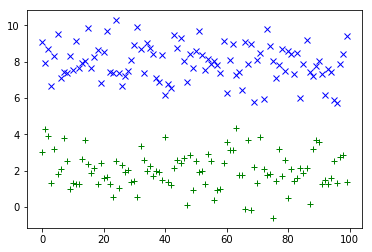

In [24]:
## import the plotting package; use inline display
import matplotlib.pyplot as plt
%matplotlib inline
## plot two subsets using different markers
plt.plot(d1,'g+')
plt.plot(d2,'bx')

# the axis 0 - 100 is the array index

Note for better visualization we "expand" the 1-D data for 2-D display using the array index for the x-axis.

We then concatenate the two data clouds into one bigger array (with 200 points):

In [25]:
data=np.concatenate((d1,d2),axis=0)
nrow=len(data)

... and we shuffle the rows to get the data mixed up:

In [26]:
data=np.random.permutation(data)

To do k-means clustering, now we randomly initialise the membership for Cluster 1 (and therefore for Cluster 2)

In [27]:
memb1=np.random.randint(0,2,nrow)
memb2=1-memb1    # membership to Cluster 2

Let the iterations begin: update centres; update membership; ... we run 20 iterations:

In [28]:
## Iterate for a number of times and see if convergence is reached. 
## c1 and c2 are the two cluster centres. 
## This updates the centres, then membership, and loops around
for it in range(20):
   c1=sum(data*memb1)/sum(memb1)
   c2=sum(data*memb2)/sum(memb2)
   # if distance to c1 is smaller it belongs to cluster 1, memb1=1; otherwise memb1=0
   memb1=np.less(np.abs(data-c1), np.abs(data-c2)).astype(int)
   memb2=1-memb1

Now display the cluster centres:

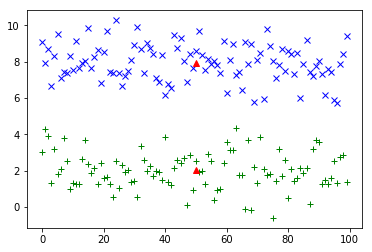

In [29]:
## Display the cluster centers
plt.plot(d1,'g+')
plt.plot(d2,'bx')
plt.plot(nrow/4,c1,'r^')
plt.plot(nrow/4,c2,'r^')

Does the algorithm seem to work? Why?

Your Answer: 


**Task A**. Suppose there is an outlier data point, data[80]=200. Insert it, repeat the experiement above and comment on the results.

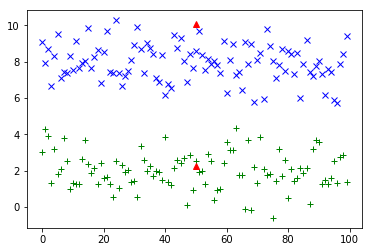

In [30]:
# code for Task A ...
data[80]=200

for it in range(20):
   c1=sum(data*memb1)/sum(memb1)
   c2=sum(data*memb2)/sum(memb2)
   # if distance to c1 is smaller it belongs to cluster 1, memb1=1; otherwise memb1=0
   memb1=np.less(np.abs(data-c1), np.abs(data-c2)).astype(int)
   memb2=1-memb1

## Display the cluster centers
plt.plot(d1,'g+')
plt.plot(d2,'bx')
plt.plot(nrow/4,c1,'r^')
plt.plot(nrow/4,c2,'r^')

Your comments: 







**Task A***. Use the fuzzy c-means scheme with r=2 to decide membership and repeat the experiment. Does it work better?

In [ ]:
# code for Task A* here... Run it.

Comments on the outcome:



## Part 2

We can extend the code and do the clustering using EM instead. Let's cleanse the outlier out first.

In [ ]:
data[80]=np.random.randn()+2

In [ ]:
## Try EM (simplified)
## Random initialization again. Alternatively, k-means can be used.
memb1=np.random.randint(0,2,nrow)
memb2=1-memb1

The following gives the iterations of a simplified EM process. First the two centres are updated using weighted average of members, then the variations. The memberships are then tuned as $e^-\frac{(x-c)^2}{2s}$ and then normalized. This continues and after a number of iterations the outcome stablizes.

In [ ]:
## now the iterations
for it in range(50):
    # update centres
    c1=sum(memb1*data)/sum(memb1)
    c2=sum(memb2*data)/sum(memb2)
    # update 'spread' - the variations
    s1=sum(memb1*(data-c1)**2)/sum(memb1)
    s2=sum(memb2*(data-c2)**2)/sum(memb2)
    # print the center and std
    print 'it=',it,':', c1,'/',np.sqrt(s1),'||',c2,'/',np.sqrt(s2)
    # re-calculate memberships using the center and std values
    memb1=np.exp(-(data-c1)**2/s1/2)
    memb2=np.exp(-(data-c2)**2/s2/2)
    # normalise
    memb1/=(memb1+memb2)
    memb2/=(memb1+memb2)

Run the code above a couple of times, and see whether it manages to calculate the centres and the spreads of the two Gaussians. Are the clusters correctly located?


** Task B. **
Now, let us take a look whether EM can model data "clouds" of different sizes. For this, comment off the random initialization again. Find the line with 'd2' assignment, and modify it into "d2 = np.random.randn(100)*1.5+8". This means the second cloud has now a bigger spread (stdev=1.5). Run the code to this line, and note what the result tells you about the Gaussian centres and their spreads. If the result is not quite right, try a few more runs.

Then, reuse the code in Part A and conduct k-means clustering to *initialize* the cluster centers and then carry on with EM. Does this work better? 

In [ ]:
## your code for Task B

Your comments: ...




## Part 3

So far we have been working on 1-D data points. Let's add another dimension so that they can be properly displayed on the screen. The following k-means code, is good for general-purpose clustering - note there are quite a few changes made to the previous code, mainly to deal with arrays of higher dimensionality. The algorithm is simplified, without looking at stdev of the clusters. 

In [ ]:
## generate two random data 'clouds' around [2,2] and [8,8], each with 100 points
d1 = np.random.randn(100,2)+2
d2 = np.random.randn(100,2)+5
## show them up on the screen. 
plt.plot(d1[:,0],d1[:,1],'g+')
plt.plot(d2[:,0],d2[:,1],'bx')
plt.grid(b=True)

Again, stack the two sets and shuffle it so it doesn't have any particular order.

In [ ]:
## mix two data clouds into one array (200 points)
data=np.vstack((d1,d2))
data=np.random.permutation(data)
nrow,ncol=data.shape

We then define a random initialization function:

In [ ]:
def randInitWithData(data, k):
    nrow,dim=data.shape
    centres=np.zeros((k,dim))
    for i in range(k):
        centres[i]=data[np.random.randint(nrow)].copy()
    return centres

and test the function out with k=2:

In [ ]:
centres=randInitWithData(data,k=2)

In [ ]:
print centres      # Where are the initial centres?

Now we define a function for going through an iteration of finding membership and update centres:

In [ ]:
def iterate(centres,data):
    k,dim=centres.shape
    nrow,dim=data.shape
    ## Compute distances between centres and data points. 
    ## Start with the first centre and then stack the rest vertically
    distances = np.sum((data-centres[0,:])**2,axis=1)
    for j in range(k-1):
        distances = np.vstack((distances, np.sum((data-centres[j+1,:])**2,axis=1)))
        ## 'distances' is a 2D array: row for centres, column for data items
        ## Identify the closest cluster for each data item
        cluster = distances.argmin(axis=0)
        ## Turn it into a single-column array
        cluster = cluster.reshape((nrow,1))
        ## Update the cluster centres as the mean of data items that are closest to them
        for j in range(k):
            thisCluster = np.where(cluster==j,1,0)      # decide membership
            if np.sum(thisCluster)>0:
                centres[j,:] = np.sum(data*thisCluster,axis=0)/np.sum(thisCluster)
    return centres.copy()

In [ ]:
oldcentres=centres.copy()      # keep track of the old centres

Now we call iteratre() a number of times and see if it converges:

In [ ]:
for i in range(10):
    centres=iterate(centres,data)
    print centres
    print np.sum(np.abs(centres-oldcentres))    # calculate difference
    oldcentres=centres.copy()

Run the code. Do you think it manages to locate the cluster centers in the right places? 

You may want to write a few functions for the above k-means code to automatically stop iterations once convergence is reached.

Let's show them up on the screen again:

In [ ]:
## show them up on the screen. 
plt.plot(d1[:,0],d1[:,1],'g+')
plt.plot(d2[:,0],d2[:,1],'bx')
plt.plot(centres[:,0],centres[:,1],'ro')

## Part 4

Let's experiment with another clustering algoithm and take a quick look of clustering evaluation. For this we turn to Scikit.learn, a package specialised for Machine Learning. First, some necessary imports:

### DBSCAN

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

We use sklearn's data generators to make three blobs:

In [ ]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)
X = StandardScaler().fit_transform(X)

Suppose we set Eps to 0.3, and the minimum number of neighbours needed for a data point to become core points is 10. The following cluster the dataset using DBSCAN, predict cluster labels for all data points, and mark out core points:

In [ ]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

The <code>fit()</code> function will learn from the data, and label all data points. Note  DBSCAN will mark out core points, border points, and noise points. Noise points are not clustered, so in sklearn's implementation it takes a label of -1 (while others take 0, 1, ...). The number of clusters can be found by:

In [ ]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)

### Visualization

Using the learning outcome, we can visualize the clustering results. The following code colours the data points according to their cluster IDs, with core points displayed by large markers. Noisy points are displayed in black:

In [ ]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # plot core points 
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    # non-core points
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)

See if you can tell the data point types apart: core points, border points, and noise points. 

### Evaluation

To evaluate the clustering outcome, there are a number of indeces one can use. Here we take a quick look on Silhouette Score.

For a data point with a cluster, its Silhouette Coefficient is decided by two scores:
- a: The mean distance between a sample and all other points in the same cluster.
- b: The mean distance between a sample and all other points in the next nearest cluster.
The Silhouette Coefficient $s$ for the data point is then given as:
$s = \displaystyle\frac{b - a}{max(a, b)}$

The average Silhouette Coefficient of the overall clustering outcome is reported by:

In [ ]:
metrics.silhouette_score(X, labels, metric='euclidean')

The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.

**Task C**. Parameters play important part in clustering algorithms. How does the setting of Eps affect the clustering outcome? Print out the number of clusters found, and the Silhouette Score when eps takes value from this list: [0.1,0.15,0.2,0.25,0.3,0.35,0.4].

In [ ]:
# Your code here

Comment on your findings: 








**Task D**. Use the Sklearn K-means function to redo the clustering with k=2, 3, 4, 5. Compare the outcomes of using two initialization schemes: plain random initialization, and k-means++. Report the Silhouette Scores.  

In [ ]:
# Your code

Comment on your findings:


END OF LAB 2.